In [1]:
from sklearn.cluster import KMeans 

import pandas as pd 

from sklearn.preprocessing import MinMaxScaler 

from matplotlib import pyplot as plt 

In [2]:
df = pd.read_csv("Mall_Customers.csv") 

df.head() 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Remoção do ID - atributo nada contribui para Clustering 

df = df.drop('CustomerID', axis=1) 

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [4]:
# Transformação de Dados de Categórico para Numérico 

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1}) 

 

df.describe() 

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


Text(0, 0.5, 'Annual Income (k$)')

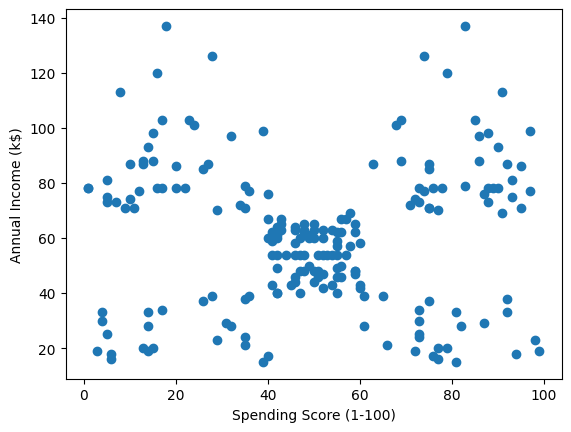

In [5]:
# Gráfico de Dispersão: Spending Score (1-100) x Annual Income (K$) 

plt.scatter(df['Spending Score (1-100)'],df['Annual Income (k$)']) 

plt.xlabel("Spending Score (1-100)") 

plt.ylabel('Annual Income (k$)') 

In [6]:
# WCSSE 

sse = [] 

k_rng = range(1,10) 

for k in k_rng: 

    km = KMeans(n_clusters=k) 

    km.fit(df[['Spending Score (1-100)','Annual Income (k$)']]) 

    sse.append(km.inertia_) 

print(sse) 

[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.4554479337, 37265.86520484347, 30241.343617936593, 25018.57633477633, 21996.523372372307]


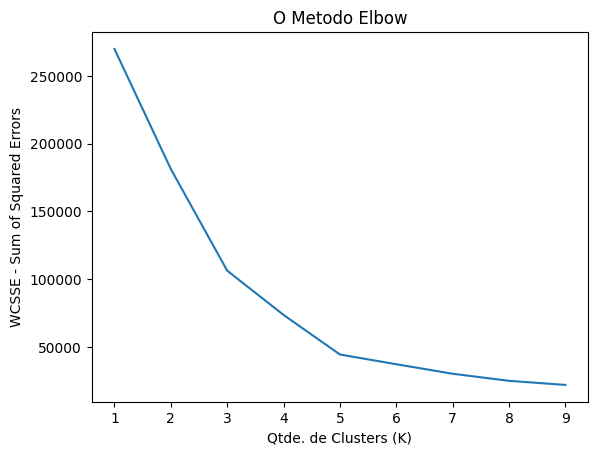

In [7]:
plt.title('O Metodo Elbow') 

plt.xlabel('Qtde. de Clusters (K)') 

plt.ylabel('WCSSE - Sum of Squared Errors') # Within Cluster Sum of Squares 

plt.plot(k_rng,sse) 

In [8]:
# Construção do Modelo de ML 

km = KMeans(n_clusters=4) #  

In [9]:
# Aplicação do Modelo:      Index:  0       1           2                      3 

y_predicted = km.fit_predict(df[['Gender','Age', 'Spending Score (1-100)','Annual Income (k$)']]) 

y_predicted 

array([3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [12]:
# Centróides 

# 4 Grupos (k=4); Cada Centróide tem 4 colunas - Gender, Age, Annual Income (k$), Spending Score (1-100) 

km.cluster_centers_  

array([[ 0.47368421, 40.39473684, 18.63157895, 87.        ],
       [ 0.62105263, 44.89473684, 42.63157895, 48.70526316],
       [ 0.53846154, 32.69230769, 82.12820513, 86.53846154],
       [ 0.5       , 24.82142857, 74.25      , 28.71428571]])

In [13]:

# Inclusão do Centróide como uma nova coluna do Dataframe 

df['cluster']=y_predicted 

df.head() 

 

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,0,19,15,39,3
1,0,21,15,81,3
2,1,20,16,6,1
3,1,23,16,77,3
4,1,31,17,40,1


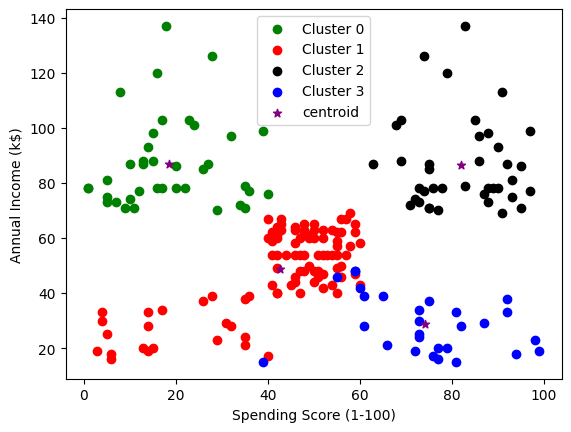

In [11]:
# Comparação de Clusters: Spending Score (1-100) vs. Annual Income (k$) 

# Index nos Centróides: 0-Gender; 1-Age; 2-Spending Score (1-100); 3-Annual Income (k$) 

df1 = df[df.cluster==0] 

df2 = df[df.cluster==1] 

df3 = df[df.cluster==2] 

df4 = df[df.cluster==3] 

plt.scatter(df1['Spending Score (1-100)'],df1['Annual Income (k$)'] ,color='green',label='Cluster 0') 

plt.scatter(df2['Spending Score (1-100)'],df2['Annual Income (k$)'] ,color='red',label='Cluster 1') 

plt.scatter(df3['Spending Score (1-100)'],df3['Annual Income (k$)'] ,color='black',label='Cluster 2') 

plt.scatter(df4['Spending Score (1-100)'],df4['Annual Income (k$)'],color='blue',label='Cluster 3') 

plt.scatter(km.cluster_centers_[:,2],km.cluster_centers_[:,3],color='purple',marker='*',label='centroid') 

plt.xlabel("Spending Score (1-100)") 

plt.ylabel('Annual Income (k$)') 

plt.legend() 